# Information Theory, Inference, and Learning Algorithms


<div style="text-align: right"> David J.C. MacKay </div>

I will be coding various things as I go through his textbook

***

<h1><center>1. Introduction to Information Theory</center></h1>

>The fundamental problem of communication is that of reproducing at one point either exactly or approximately a message selected at another point. _(Claude Shannon, 1948)_


## 1.1 How can we achieve perfet communication over an imperfect, noisy communication channel

Examples of noisy channels:
- an analogue telephone line, over which two modems communicate digital information
- the radio communication link from Galileo, the Jupiter-orbiting spacecraft, to earth
- reproducing cells, in which the daughter cells's DNA contains information from the parent cells
- a disk drive


<div>
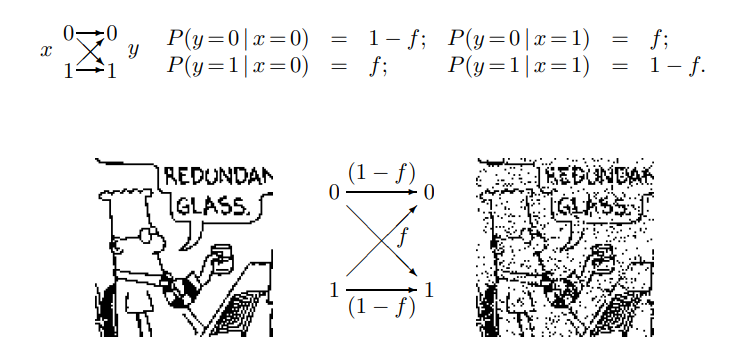
</div>

These channels are "noisy" as there is a lot of opportunity for the data in them to be changed. 

Here is an example with an image from the textbook. There is an inital image with $10000$ bits of data. The bits are either $1$ or $0$ and translate to white or black pixels. There is a probability of $f$ that any particular bit will flip from $1$ to $0$. This is called a _binary symmetric channel_

There are systematic ways we can reduce the noise in this system using encoders and decoders. 

### 1.1a Coding the Binary symmetric channel

#### Importing libraries

In [146]:
from PIL import Image                       # To open, crop and change images
import matplotlib.pyplot as plt             # To plot the image
import math                                 # To perform mathematical operations
import numpy as np                          # To create and manipulate arrays
from numpy import asarray                   # To convert an image to an numpy array

#### Import an Image and transform it to a binary image

In [147]:
def convert_image(location):
    
    the_image = Image.open(location)
    the_image = the_image.convert("1")     # Converts to a binary image
    #the_image.thumbnail((256,256))
    
    image_array = asarray(the_image)       # Converts image to an array
    image_array = image_array.astype(int)  # Converts the array to integers (1's and 0's) rather than boolean values
    
    
    
    return image_array

#### Create the Noise Channel

In [148]:
def binary_symmetric_channel(prob_of_switch, array):
    prob = np.array([1-prob_of_switch,prob_of_switch])   # Creates an array where the first element is the probabilty of staying
                                                         # the same and the second element is the probabilty of the bit flip
        
    new_array = np.copy(array)                           # Takes a copy of the original image
    z_h, z_w = new_array.shape                           # The new array is the same size as the original array
    
    for h in range(z_h):
        for w in range(z_w):
            noise = np.random.choice(prob,p=prob)
            
            if noise == prob_of_switch:
                new_array[h][w] = (new_array[h][w]+1)%2  # Updates new matrix
    return new_array


#### Calculate the amount of bit flips

In [149]:
def difference_in_arrays(array,new_array):
    zero_to_one = np.greater(new_array, array)
    one_to_zero = np.greater(array,new_array)
    
    changes = zero_to_one.sum() + one_to_zero.sum()
    
    print("The number of flipped pixels are: ",changes)
    
    shape_of_array = array.shape
    total_pixels = shape_of_array[0] * shape_of_array[1]
    
    print("The number of total pixels are: ",total_pixels)
    
    prob_of_changes = changes/total_pixels
    
    print("The percent of the bits that were flipped is: ", prob_of_changes)

    

#### Function to display the image

In [150]:
def print_array_image(array):
    array = np.array(array, dtype=bool)
    print(array.shape)
    plt.figure(figsize=(8, 6))
    plt.imshow(array,cmap = 'gray')
    plt.show()

#### Try the noisy channel with 0.1 chance the bit flips


(300, 332)


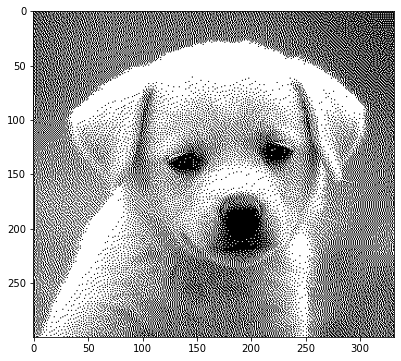

(300, 332)


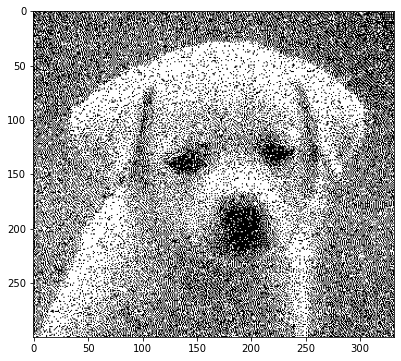

The number of flipped pixels are:  9934
The number of total pixels are:  99600
The percent of the bits that were flipped is:  0.09973895582329317


In [151]:
location =r"C:\Users\preet\Desktop\image_six.jpg"
array = convert_image(location)
print_array_image(array)
new_array = binary_symmetric_channel(0.1,array)
print_array_image(new_array)
x = difference_in_arrays(array, new_array)

## 1.2 Error-correcting codes for the binary symmetric channel

### Repetition codes

The idea is to create multiple copies of the same bit. If one of them changes we can look at the others. 


### 1.2a Coding the repetition code

#### Encoding the image with repetition code

In [152]:
def repetition_encoding(array, number):
    n_H, n_W = array.shape
    
    encoded_array = np.zeros((n_H*number,n_W))

    
    for w in range(n_W):
        for h in range(n_H):
            pixel = array[h][w]
            
            for num in range(number):
                encoded_array[h+num*n_H][w] = pixel
    return encoded_array


#### Decoding the Image with repetition encoding after put through a noise channel

In [153]:
def decoding_repetition(array,num):
    n_H, n_W = array.shape
    decoded_matrix = np.zeros((int(n_H/3),int(n_W)))
    
    for w in range(int(n_W)):
        for h in range(int(n_H/3)):
            pixels = []
            for n in range(num):
                pixel = array[h+n*int(n_H/3)][w]
                pixels.append(pixel)
                
            if int(sum(pixels)) == 0:
                decoded_matrix[h][w] = 0
            elif int(sum(pixels)) == 1:
                decoded_matrix[h][w] = 0
            elif int(sum(pixels)) == 2:
                decoded_matrix[h][w] = 1
            elif int(sum(pixels)) == 3:
                decoded_matrix[h][w] = 1
                
    return decoded_matrix

#### Try the repetition encoding:

(900, 332)


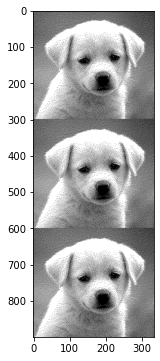

(900, 332)


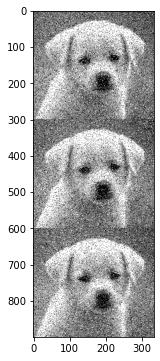

(300, 332)


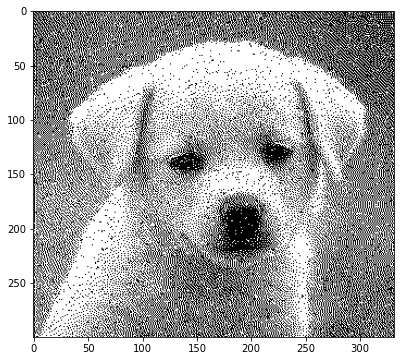

The number of flipped pixels are:  2724
The number of total pixels are:  99600
The percent of the bits that were flipped is:  0.027349397590361445


In [160]:
encoded_matrix = repetition_encoding(array,3)
print_array_image(encoded_matrix)
encoded_matrix_with_noise = binary_symmetric_channel(0.1, encoded_matrix)
print_array_image(encoded_matrix_with_noise)
decoded_matrix = decoding_repetition(encoded_matrix_with_noise,3)

print_array_image(decoded_matrix)
difference_in_arrays(array,decoded_matrix)

### Block codes - the (7,4) Hamming Code



### 1.2b Coding the Hamming Code:

#### Encode the Image:

In [155]:
def encoding_hamming(data):
    G = np.array([[1,0,0,0,1,0,1],[0,1,0,0,1,1,0],[0,0,1,0,1,1,1],[0,0,0,1,0,1,1]])
    n_H,n_W = data.shape

    new_h = int(n_H + n_H/4*3)

    T = np.zeros((new_h,n_W))

    h_start = 0
    t_start_parity = n_H
    t_start = 0

    for w in range(n_W):

        for h in range(int(n_H/4)):
            slice_of_data = data[h_start:h_start+4, w:w+1]
            t = np.dot(G.T,slice_of_data)%2

            T[t_start:t_start+4,w:w+1] = T[t_start:t_start+4,w:w+1]+t[0:4]
            T[t_start_parity:t_start_parity+3,w:w+1] = T[t_start_parity:t_start_parity+3,w:w+1]+t[4:7]

            h_start += 4
            t_start_parity += 3
            t_start += 4

        h_start=0
        t_start = 0
        t_start_parity = n_H
        
    return T
    


#### Decoding the Matrix

In [156]:
def decoded_hamming(next_noise):
    H = np.array([[1,1,1,0,1,0,0],[0,1,1,1,0,1,0],[1,0,1,1,0,0,1]])
    n_H,n_W = next_noise.shape
    n_H = int(n_H/7 * 4)
    new_noise = next_noise.astype(int)
    Z = np.zeros((n_H, n_W))
    k_H, k_w = Z.shape

    new_start_h = 0
    new_start_h_parity = n_H
    z_h = 0
    

    for w in range(k_w):
        for h in range(int(k_H/4)):

            t_1 = new_noise[new_start_h:new_start_h+4,w:w+1]
            t_2 = new_noise[new_start_h_parity:new_start_h_parity+3,w:w+1]

            t = np.array([t_1[0],t_1[1],t_1[2],t_1[3],t_2[0],t_2[1],t_2[2]])
            syndrome = np.dot(H,t)%2

            if (syndrome == np.array([[1],[0],[1]])).all():
                t[0][0] = (t[0][0]+1)%2
            elif (syndrome == np.array([[1],[1],[0]])).all():
                t[1][0] = (t[1][0]+1)%2
            elif (syndrome == np.array([[1],[1],[1]])).all():
                t[2][0] = (t[2][0]+1)%2

            Z[z_h:z_h+4 , w:w+1] = t[0:4]

            new_start_h += 4
            new_start_h_parity += 3
            z_h += 4

        new_start_h = 0
        new_start_h_parity = n_H
        z_h = 0
    return Z


#### Try the Hamming code:

(300, 332)
(525, 332)


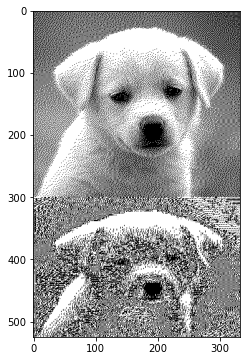

(525, 332)


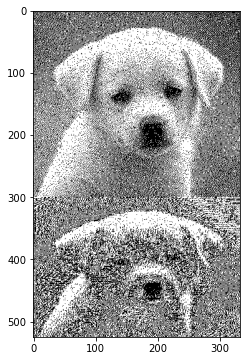

(300, 332)


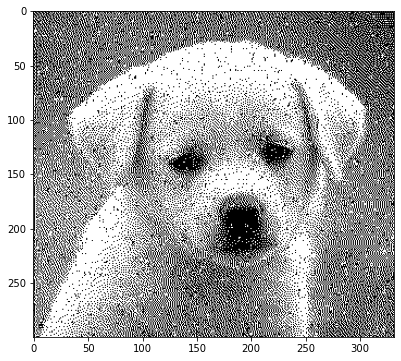

The number of flipped pixels are:  2662
The number of total pixels are:  99600
The percent of the bits that were flipped is:  0.026726907630522087


In [161]:
location =r"C:\Users\preet\Desktop\image_six.jpg"
array = convert_image(location)
print(array.shape)
encoded_matrix_h = encoding_hamming(array)
print_array_image(encoded_matrix_h)

encoded_matrix_with_noise_h = binary_symmetric_channel(0.05, encoded_matrix_h)
print_array_image(encoded_matrix_with_noise_h)

decoded_matrix_h = decoded_hamming(encoded_matrix_with_noise_h)
print_array_image(decoded_matrix_h)

difference_in_arrays(array,decoded_matrix_h)
